In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

In [2]:
profits = {'Utilities': 10.6, 
           'Real Estate': 22.1, 
           'Materials': 12.6,
           'Technology': 23.2,
           'Industrials': 8.4, 
           'Pharma': 23.1, 
           'Health Care': 8.7, 
           'Financials': 25.3, 
           'Energy': 8.2, 
           'Consumer Staples': 6.6,
           'Communications': 17.5, 
           'Consumer Discretionary': 8.9}

df = pd.DataFrame(profits.items(), 
                  columns=['Sector', 'Percent Profit'])
df = df.sort_values(by='Percent Profit')
df.head()

,Sector,Percent Profit
9,Consumer Staples,6.6
8,Energy,8.2
4,Industrials,8.4
6,Health Care,8.7
11,Consumer Discretionary,8.9


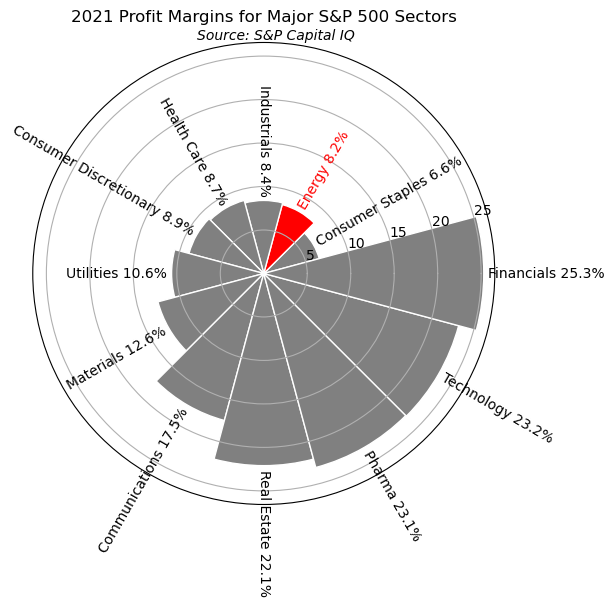

In [3]:
# Set-up figure:
plt.figure(figsize=(6, 6))
ax = plt.subplot(polar=True)
plt.axis('off')
LOWER_LIMIT = 0
LABEL_PAD = 0.5

# Set bar colors to highlight the Energy sector:
bar_colors = ['red' if sector == 'Energy' else
              'gray' for sector in df.Sector]

# Set height and width of bars:
heights = df['Percent Profit']
width = 2 * np.pi / len(df.index)  # Note: 2pi radians = 360 degrees.

# Create list of indexes and calculate theta angle for polar plot:
indexes = list(range(1, len(df.index)+1))
theta = [i * width for i in indexes]

# Create radial bar plot:
bars = ax.bar(x=theta, 
              height=heights, 
              width=width, 
              bottom=LOWER_LIMIT,
              linewidth=1, 
              edgecolor="white", 
              color=bar_colors)

# Loop through parameters and set bar labels to df column values:
for bar, theta, label1, label2 in zip(bars, theta, 
                                      df['Sector'], 
                                      df['Percent Profit']):
    
    # Combine df column names into final label (e.g., "Energy 8.2%"):
    label = label1 + ' ' + str(label2) + '%'

    # Orient labels based on semicircle location:
    rotation = np.rad2deg(theta)
    if np.pi/2 <= theta < 3*np.pi/2:
        alignment = "right"
        rotation = rotation + 180
    else: 
        alignment = "left"

    color = 'red' if label1 == 'Energy' else 'k'
        
    # Add bar labels with Energy sector in red:
    ax.text(x=theta, y=LOWER_LIMIT + bar.get_height() + LABEL_PAD,
            s=label, 
            ha=alignment, 
            va='center', 
            rotation=rotation, 
            rotation_mode="anchor", 
            color=color)
    
# Turn on the grid
plt.axis('on')

# Add the following to the end
# To turn off the polar grid and degree labels
ax.set_thetagrids([], labels=[])

#To set the position of the radius labels
ax.set_rlabel_position(15)

ax.set_title('2021 Profit Margins for Major S&P 500 Sectors', y=1.0, pad=15)

ax.text(np.pi/1.7, 28, 
        'Source: S&P Capital IQ', 
        fontstyle='italic', 
        fontsize=10);  